타이타닉호 생존율분석
1. 데이터 수집

In [49]:
import seaborn as sns
import pandas as pd

titanic = sns.load_dataset('titanic')
titanic.to_csv('titanic2.csv', index=False)

2. 데이터 준비

In [ ]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [40]:
titanic['age'] = titanic['age'].fillna(titanic['age'].mean())

titanic['embarked'].value_counts()
titanic['embarked'] = titanic['embarked'].fillna('S')

titanic['embark_town'].value_counts()
titanic['embark_town'] = titanic['embark_town'].fillna('Southampton')

titanic['deck'].value_counts()
titanic['deck'] = titanic['deck'].fillna('C')

titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

3. 데이터 탐색

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         891 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [42]:
titanic['survived'].value_counts()

survived
0    549
1    342
Name: count, dtype: int64

4. 차트로 시각화

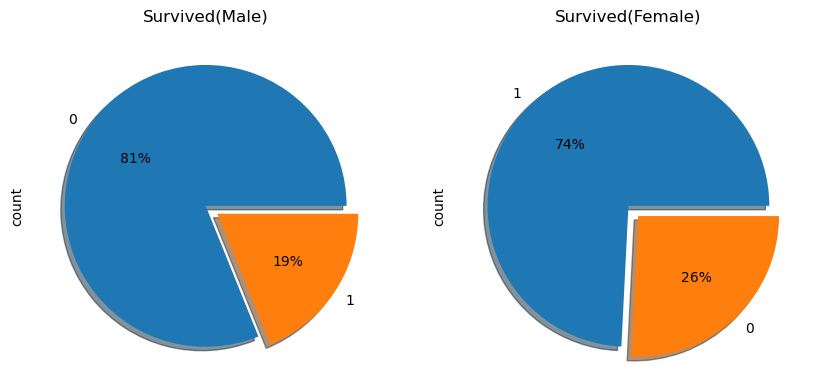

In [ ]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, 2, figsize=(10,5))
titanic['survived'][titanic['sex']=='male'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.f%%', ax=ax[0], shadow=True)
titanic['survived'][titanic['sex']=='female'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.f%%', ax=ax[1], shadow=True)
ax[0].set_title('Survived(Male)')
ax[1].set_title('Survived(Female)')
plt.show()

5. 등급별 생존자 수를 차트로 그리기

Text(0.5, 1.0, 'Pclass vs Survived')

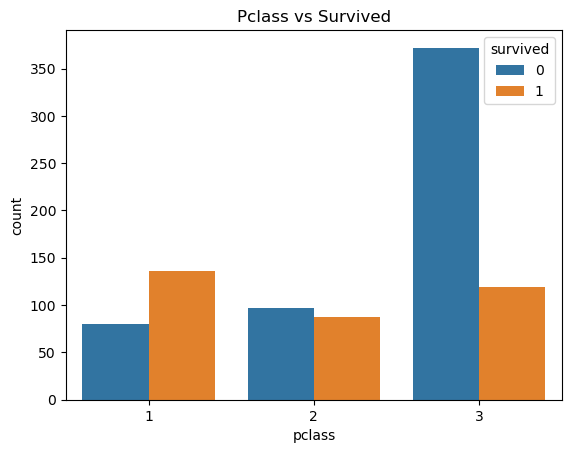

In [ ]:
sns.countplot(x='pclass', hue='survived', data=titanic)
plt.title('Pclass vs Survived')

데이터 모델링
1. 상관분석을 위한 상관계수 구하기

In [46]:
titanic2 = titanic.select_dtypes(include=[int, float, bool])
titanic2.shape

(891, 8)

In [47]:
titanic_corr = titanic2.corr(method='pearson')
titanic_corr

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566,0.253236,0.179775
sibsp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.253236,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.179775,-0.584471,-0.583398,-0.271832,0.404744,1.000000


In [50]:
titanic['survived'].corr(titanic['adult_male'])

np.float64(-0.5570800422053258)

In [52]:
titanic['survived'].corr(titanic['fare'])

np.float64(0.25730652238496227)

결과 시각화

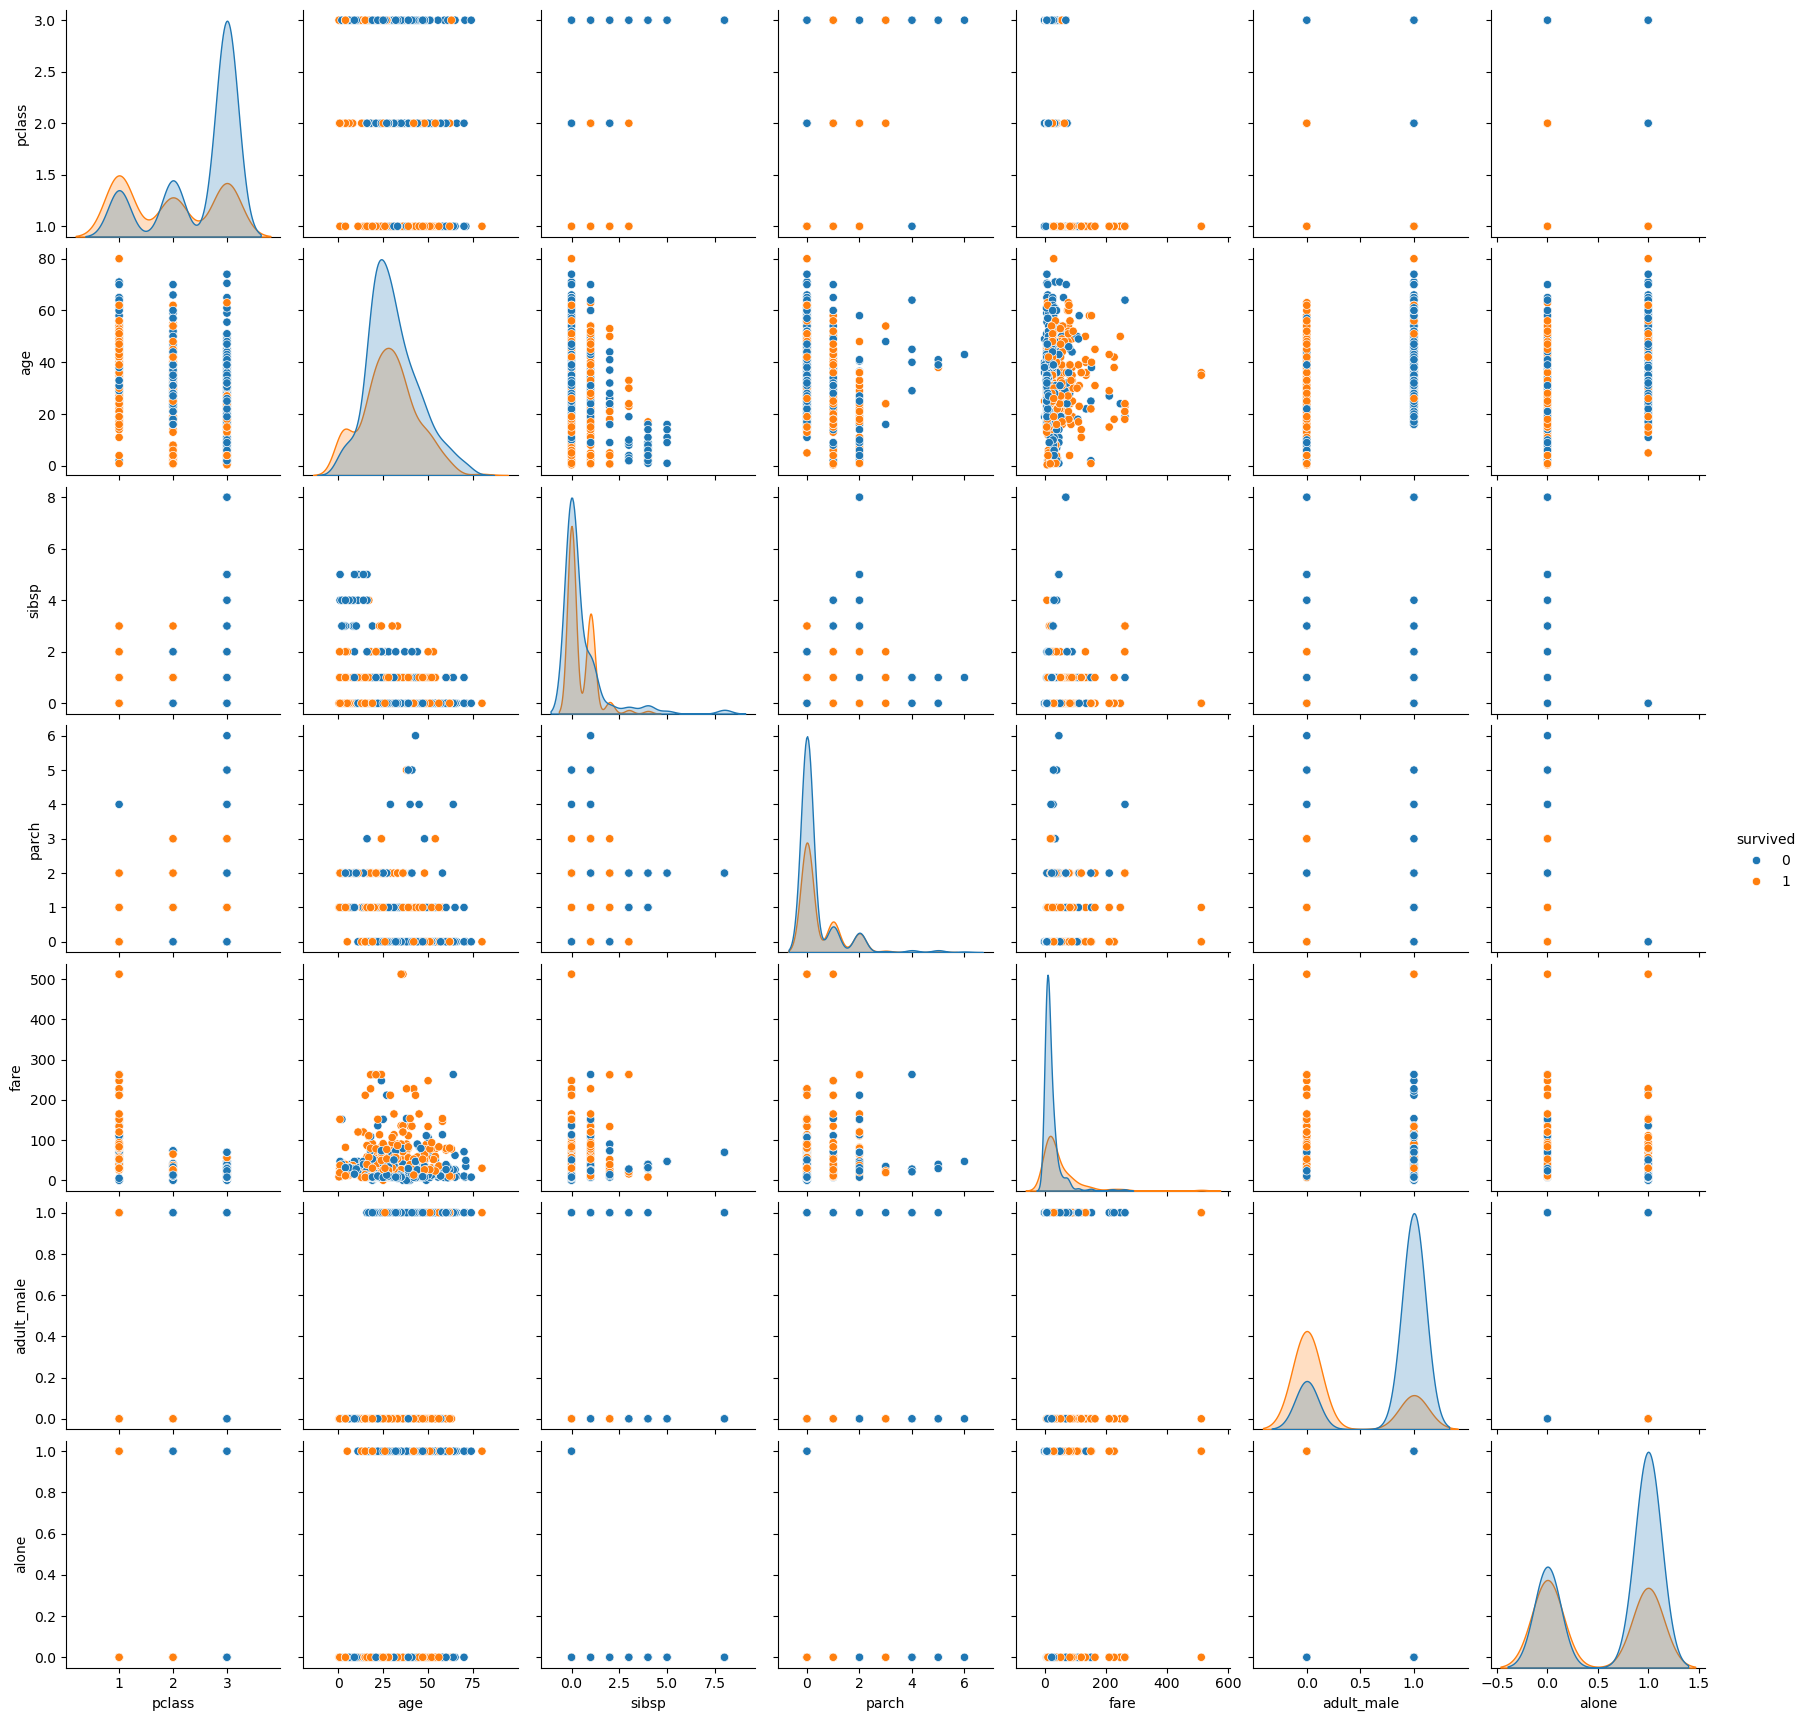

In [54]:
# 산점도
sns.pairplot(titanic, hue='survived')

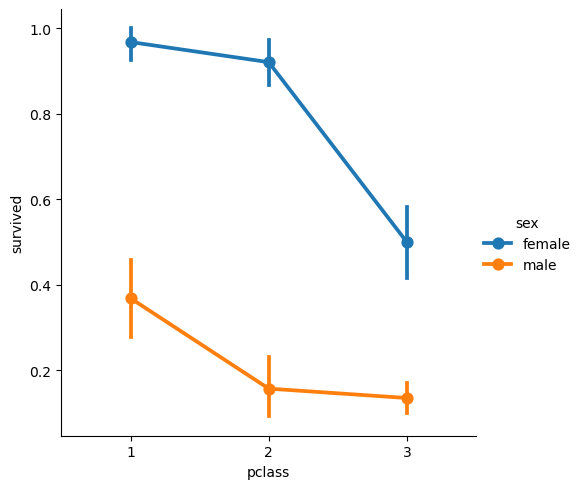

In [56]:
# 생존자의 객실 등급과 성별 관계
sns.catplot(x='pclass', y='survived', hue='sex', data=titanic, kind='point')

히트맵 만들기

In [58]:
# 히트맵
def category_age(x) :
  if x < 10 :
    return 0
  elif x < 20 :
    return 1
  elif x < 30 :
    return 2
  elif x < 40 :
    return 3
  elif x < 50 :
    return 4
  elif x < 60 :
    return 5
  elif x < 70 :
    return 6
  else :
    return 7

titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [60]:
titanic['age2'] = titanic['age'].apply(category_age)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age2
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,2
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,3
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,2
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,3
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,3


In [61]:
titanic['sex'] = titanic['sex'].map({'male':1, 'female':0})
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age2
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,2
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,3
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,2
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,3
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,3


In [63]:
titanic['family'] = titanic['sibsp'] + titanic['parch'] + 1
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age2,family
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,2,2
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,3,2
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,2,1
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,3,2
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,3,1


In [64]:
titanic.to_csv('titanic_result.csv', index=False)

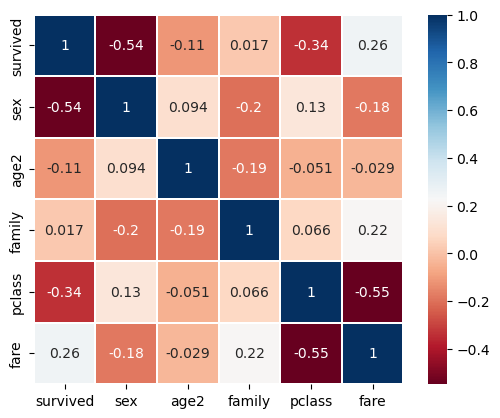

In [67]:
heatmap_data = titanic[['survived', 'sex', 'age2', 'family', 'pclass', 'fare']]
colormap = plt.cm.RdBu
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size":10})
plt.show()